In [1]:
import anndata as ad
import pandas as pd
import numpy as np
from scipy import sparse
import episcanpy as epi 
import scanpy as sc


# Now the RNA

In [2]:
rna = ad.read("/dss/dsshome1/lxc02/di82cox/data/brain_data/GSM4156610_brain_raw_cell_annot.rna.h5ad")
rna

AnnData object with n_obs × n_vars = 5875 × 21127
    obs: 'atac_barcode', 'paper_cell_type'

In [3]:
rna.var['mt'] = rna.var_names.str.startswith('MT-')

In [4]:
count = 0
for c in rna.var['mt']:
    if c == True:
        count += 1
        
print(count)

0


In [5]:
count = 0
for code in rna.obs['atac_barcode']:
    if code == 'NA':
        count += 1
        
print(count)

count = 0
for code in rna.obs['paper_cell_type']:
    if code == 'NA':
        count += 1
        
print(count)

2582
2582


In [6]:
rna.obs

,atac_barcode,paper_cell_type
index,,
R1.01.R2.01.R3.24.P1.40,NA,NA
R1.01.R2.04.R3.55.P1.40,R1.01.R2.04.R3.55.P1.32,EN07
R1.01.R2.05.R3.35.P1.40,R1.01.R2.05.R3.35.P1.32,P1
R1.01.R2.08.R3.24.P1.40,NA,NA
R1.01.R2.08.R3.45.P1.39,R1.01.R2.08.R3.45.P1.31,IN01
...,...,...
R1.96.R2.84.R3.71.P1.39,R1.96.R2.84.R3.71.P1.31,EN02
R1.96.R2.85.R3.91.P1.39,NA,NA
R1.96.R2.88.R3.65.P1.39,R1.96.R2.88.R3.65.P1.31,IN01


In [7]:
#filter out the 'NA' cells that cant be matched to a atac barcode or cell type
rna = rna[rna.obs['atac_barcode'] != 'NA']

rna = rna[rna.obs['atac_barcode'] != 'NA']
rna

View of AnnData object with n_obs × n_vars = 3293 × 21127
    obs: 'atac_barcode', 'paper_cell_type'
    var: 'mt'

In [8]:
count = 0
for code in rna.obs['atac_barcode']:
    if code == 'NA':
        count += 1
        
print(count)

count = 0
for code in rna.obs['paper_cell_type']:
    if code == 'NA':
        count += 1
        
print(count)

0
0


In [9]:
rna.obs

,atac_barcode,paper_cell_type
index,,
R1.01.R2.04.R3.55.P1.40,R1.01.R2.04.R3.55.P1.32,EN07
R1.01.R2.05.R3.35.P1.40,R1.01.R2.05.R3.35.P1.32,P1
R1.01.R2.08.R3.45.P1.39,R1.01.R2.08.R3.45.P1.31,IN01
R1.01.R2.08.R3.78.P1.39,R1.01.R2.08.R3.78.P1.31,EN02
R1.01.R2.09.R3.52.P1.40,R1.01.R2.09.R3.52.P1.32,IN02
...,...,...
R1.96.R2.79.R3.15.P1.39,R1.96.R2.79.R3.15.P1.31,MX
R1.96.R2.84.R3.71.P1.39,R1.96.R2.84.R3.71.P1.31,EN02
R1.96.R2.88.R3.65.P1.39,R1.96.R2.88.R3.65.P1.31,IN01


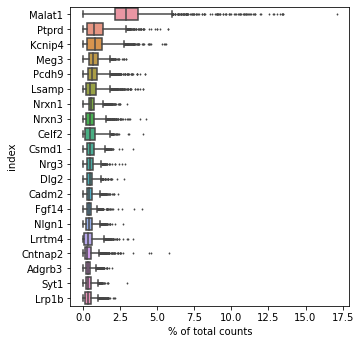

In [10]:
sc.pl.highest_expr_genes(rna, n_top = 20)

In [11]:
sc.pp.filter_cells(rna, min_genes = 200)

In [12]:
sc.pp.filter_genes(rna, min_cells = 2)

In [13]:
rna

AnnData object with n_obs × n_vars = 3264 × 18931
    obs: 'atac_barcode', 'paper_cell_type', 'n_genes'
    var: 'mt', 'n_cells'

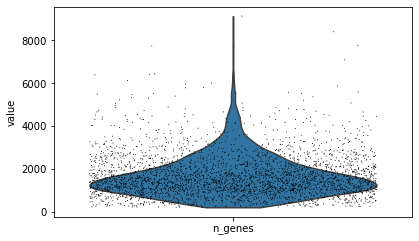

In [14]:
sc.pl.violin(rna, 'n_genes', jitter = 0.4)

In [15]:
sc.pp.calculate_qc_metrics(rna, percent_top = None, log1p = False, inplace = True)

In [16]:
rna

AnnData object with n_obs × n_vars = 3264 × 18931
    obs: 'atac_barcode', 'paper_cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'mt', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

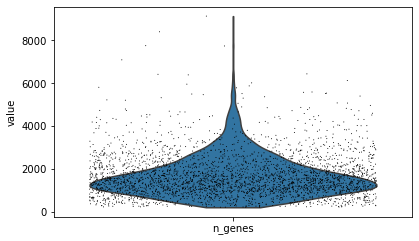

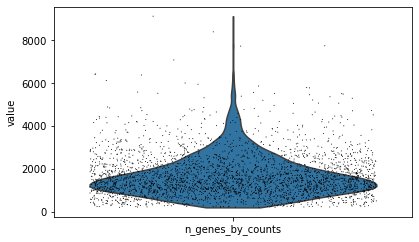

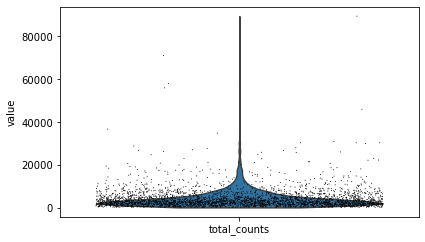

In [17]:
sc.pl.violin(rna, 'n_genes', jitter = 0.4)
sc.pl.violin(rna, 'n_genes_by_counts', jitter = 0.4) # number of genes with positive counts in a cell
sc.pl.violin(rna, 'total_counts', jitter = 0.4) # number of total counts  for a cell

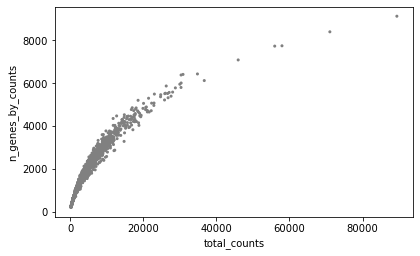

In [18]:
sc.pl.scatter(rna, x = 'total_counts', y = 'n_genes_by_counts')

In [19]:
rna

AnnData object with n_obs × n_vars = 3264 × 18931
    obs: 'atac_barcode', 'paper_cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'mt', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [20]:
# filter the anndata object
rna = rna[rna.obs.n_genes_by_counts < 7500, :]
rna

View of AnnData object with n_obs × n_vars = 3260 × 18931
    obs: 'atac_barcode', 'paper_cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'mt', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

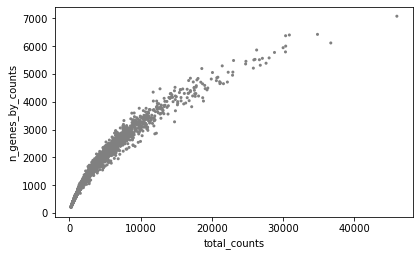

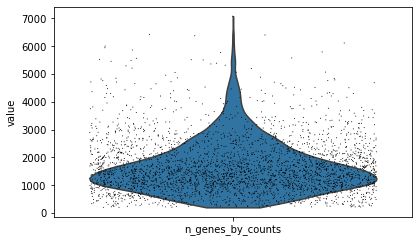

In [21]:
sc.pl.scatter(rna, x = 'total_counts', y = 'n_genes_by_counts')

sc.pl.violin(rna, 'n_genes_by_counts', jitter = 0.4)

In [22]:
# skip: normalize, logtransform too
#sc.pp.normalize_total(rna, target_sum = 1e4)
#sc.pp.log1p(rna)

In [23]:
# save the rna data
rna.write('/dss/dsshome1/lxc02/di82cox/code/sheetal/GSM4156610_brain_preprocessed_cell_annot.rna.h5ad')

In [24]:
test = ad.read('/dss/dsshome1/lxc02/di82cox/code/sheetal/GSM4156610_brain_preprocessed_cell_annot.rna.h5ad')
test

AnnData object with n_obs × n_vars = 3260 × 18931
    obs: 'atac_barcode', 'paper_cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'mt', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [33]:
# save obs and var
rna.write_csvs(dirname="/dss/dsshome1/lxc02/di82cox/code/sheetal/brain_preprocessed_rna")

writing .csv files to /dss/dsshome1/lxc02/di82cox/code/sheetal/brain_preprocessed_rna


In [35]:
# save count matrix
sparse.save_npz('/dss/dsshome1/lxc02/di82cox/code/sheetal/brain_preprocessed_rna/sparse_matrix.npz', rna.X)